# Fake News Classifier With NLP
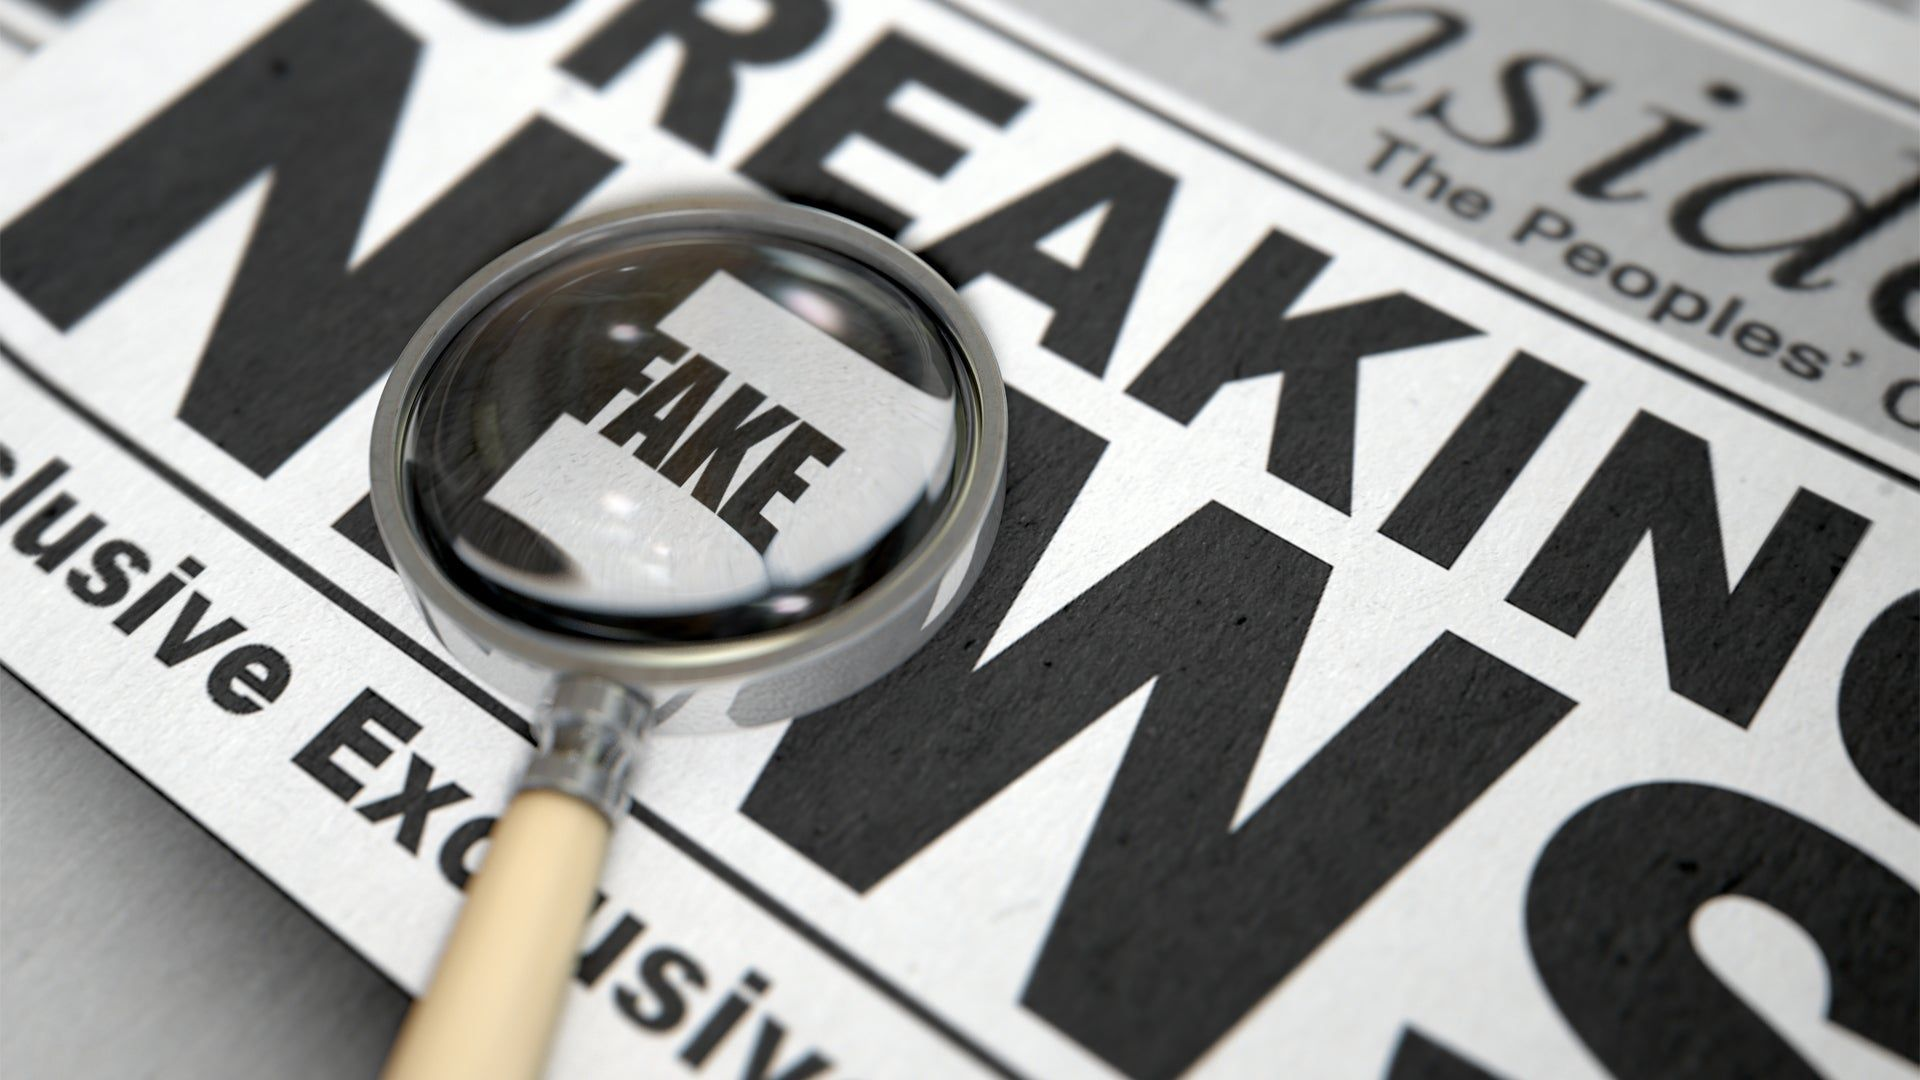

 I got an accuracy of 89% by using Bag of Words and Machine learning model Naive Bayes classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('train.csv')
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

we’ll be taking the “Id”, “Title” and “Author” columns as Independent features and the “Label” column as a dependent feature.

In [6]:
#Crteaing independent and dependent features
X=df.iloc[:,:4]
y=df.iloc[:,-1]

In [8]:
X.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  
1  Ever get the feeling your life circles the rou...  
2  Why the Truth Might Get You Fired October 29, ...  
3  Videos 15 Civilians Killed In Single US Airstr...  
4  Print \nAn Iranian woman has been sentenced to...

In [9]:
X.shape

(20800, 4)

In [10]:
#checking for missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
# we will drop the missing values 
df.dropna(inplace=True)

In [16]:
df.shape

(18285, 5)

In [19]:
df.head(10)

id                                              title  \
0    0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1    1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2    2                  Why the Truth Might Get You Fired   
3    3  15 Civilians Killed In Single US Airstrike Hav...   
4    4  Iranian woman jailed for fictional unpublished...   
5    5  Jackie Mason: Hollywood Would Love Trump if He...   
7    7  Benoît Hamon Wins French Socialist Party’s Pre...   
9    9  A Back-Channel Plan for Ukraine and Russia, Co...   
10  10  Obama’s Organizing for Action Partners with So...   
11  11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   

                          author  \
0                  Darrell Lucus   
1                Daniel J. Flynn   
2             Consortiumnews.com   
3                Jessica Purkiss   
4                 Howard Portnoy   
5                Daniel Nussbaum   
7                Alissa J. Rubin   
9   Megan Twohey and Scott Shane   
10                   Aaron Klein   
11               Chris Tomlinson   

                                                 text  label  
0   House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1   Ever get the feeling your life circles the rou...      0  
2   Why the Truth Might Get You Fired October 29, ...      1  
3   Videos 15 Civilians Killed In Single US Airstr...      1  
4   Print \nAn Iranian woman has been sentenced to...      1  
5   In these trying times, Jackie Mason is the Voi...      0  
7   PARIS  —   France chose an idealistic, traditi...      0  
9   A week before Michael T. Flynn resigned as nat...      0  
10  Organizing for Action, the activist group that...      0  
11  The BBC produced spoof on the “Real Housewives...      0

In [20]:
# Now we’ll create a copy of this dataset and also reset its index values.
news=df.copy()
news.reset_index(inplace=True)
news.head(10)

index  id                                              title  \
0      0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1      1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      2   2                  Why the Truth Might Get You Fired   
3      3   3  15 Civilians Killed In Single US Airstrike Hav...   
4      4   4  Iranian woman jailed for fictional unpublished...   
5      5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6      7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
7      9   9  A Back-Channel Plan for Ukraine and Russia, Co...   
8     10  10  Obama’s Organizing for Action Partners with So...   
9     11  11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6               Alissa J. Rubin   
7  Megan Twohey and Scott Shane   
8                   Aaron Klein   
9               Chris Tomlinson   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
5  In these trying times, Jackie Mason is the Voi...      0  
6  PARIS  —   France chose an idealistic, traditi...      0  
7  A week before Michael T. Flynn resigned as nat...      0  
8  Organizing for Action, the activist group that...      0  
9  The BBC produced spoof on the “Real Housewives...      0

### Text cleaning and preprocessing
You and I would have understood that sentence in a fraction of a second. But machines simply cannot process text data in raw form. They need us to break down the text into a numerical format that’s easily readable by the machine (the idea behind Natural Language Processing!).

BoW/TF-IDF is uded to convert text into numeric vector
- Step1: preprocess and remove [,./?} ] these fullstop
- step2: Lower the text
- step3: create lemmatization/stemning
- step4: remove stopwords from text
- step5: Creating the TF-IDF model

In [21]:
# We will clean the text by using these library:
import re   # regular expression
from nltk.corpus import stopwords # for removing stopwords from sentences
from nltk.stem.porter import PorterStemmer  #for stemning-- it will not make sentences into proper meaningful sentences 
from nltk.stem import WordNetLemmatizer   # for lemmatization- to make sentence in proper meaning

In [22]:
ps=PorterStemmer()

##### This part of the code is for Stopword removal and Stemming. Here, the corpus is an array in which we have appended all the titles of the news.

In [24]:
corpus=[]
for i in range(len(news)):
    review= re.sub('[^a-zAZ]',' ',news['title'][i])
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)

In [28]:
corpus[3]

'ivilian ill n ingl airstrik ave een dentifi'

In [30]:
#Applying count vectorizer (also known as the “Bag of Words”). Maximum features passed here are 5000.
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1, 3))
X=cv.fit_transform(corpus).toarray()


In [32]:
X.shape

(18285, 5000)

In [34]:
y=news['label'] # dependent features after dropna

In [36]:
#Dataset is now split into train and test. The first 20 features are displayed here.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
cv.get_feature_names()[:20]

['aa',
 'ab',
 'abandon',
 'abbi',
 'abduct',
 'abe',
 'abedin',
 'abel',
 'abi',
 'abinet',
 'abinet ick',
 'abit',
 'abl',
 'abor',
 'abort',
 'abotag',
 'abour',
 'abroad',
 'absolut',
 'absurd']

In [37]:
#what are hyperparameter we used 
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
#The array is converted into dataframe.
df_news=pd.DataFrame(X_train,columns=cv.get_feature_names())
df_news.head()

aa  ab  abandon  abbi  abduct  abe  abedin  abel  abi  abinet  ...  zero  \
0   0   0        0     0       0    0       0     0    0       0  ...     0   
1   0   0        0     0       0    0       0     0    0       0  ...     0   
2   0   0        0     0       0    0       0     0    0       0  ...     0   
3   0   0        0     0       0    0       0     0    0       0  ...     0   
4   0   0        0     0       0    0       0     0    0       0  ...     0   

   zika  zika iru  zionist  zone  zone ew  zone ew ork  zoo  zu  zuckerberg  
0     0         0        0     0        0            0    0   0           0  
1     0         0        0     0        0            0    0   0           0  
2     0         0        0     0        0            0    0   0           0  
3     0         0        0     0        0            0    0   0           0  
4     0         0        0     0        0            0    0   0           0  

[5 rows x 5000 columns]

In [39]:
# Building the model
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [40]:
#predicting 
y_pred=nb.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[1861  179]
 [ 191 1426]]
0.8988241728192508
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2040
           1       0.89      0.88      0.89      1617

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



## Passive Aggressive Classifier Algorithm

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [45]:
y_pred = linear_clf.predict(X_test)

In [46]:
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[1892  148]
 [ 155 1462]]
0.9171452009844134
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2040
           1       0.91      0.90      0.91      1617

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657

